In [42]:
import pandas as pd 
import numpy as np
import scipy 
import scipy.stats
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
str1, str2 = 'Hue', 'Color_Intensity'
data = pd.read_csv("../datasets/wine-clustering.csv")
data = data[[str1, str2]]
data

,Hue,Color_Intensity
0,1.04,5.64
1,1.05,4.38
2,1.03,5.68
3,0.86,7.80
4,1.04,4.32
...,...,...
173,0.64,7.70
174,0.70,7.30
175,0.59,10.20
176,0.60,9.30


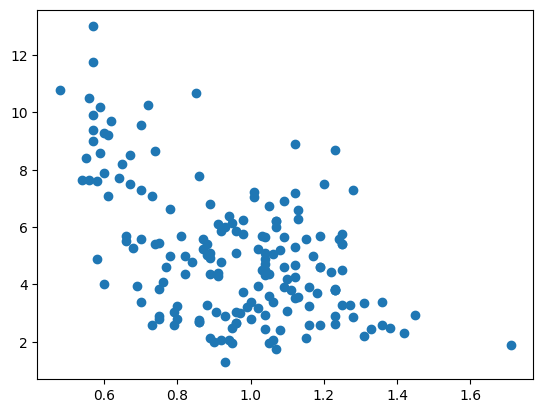

In [43]:
x1, x2 = data[str1], data[str2]
plt.plot(x1, x2, 'o')
plt.show()

In [44]:
alpha = 0.05   
# data = data.to_numpy()
i = 3 

In [45]:
data1 = data.copy()
l = len(data)
C = []
C.append(data1.iloc[:round(0.333333*l)].mean().to_numpy())
C.append(data1.iloc[round(0.333333*l):round(0.666666*l)].mean().to_numpy())
C.append(data1.iloc[round(0.666666*l):].mean().to_numpy())
C

[array([1.0620339 , 5.52830508]),
 array([1.0956, 3.112 ]),
 array([0.71237288, 6.56694914])]

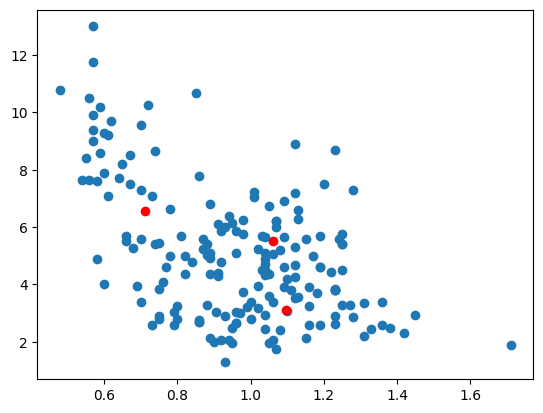

In [46]:
x1, x2 = data[str1], data[str2]
plt.plot(x1, x2, 'o')
x11 = [C[0][0], C[1][0], C[2][0]]
x22 = [C[0][1], C[1][1], C[2][1]]
plt.plot(x11, x22, 'ro')
plt.show()



In [47]:
data = data.to_numpy()
C = np.array(C)
m = np.zeros((3, l))
for i in range(3):
    for j in range(l):
        s = 0 
        for k in range(2):
            C1 = C[:][k]
            C1 = np.array(C1)
            data11 = data[j]
            data11 = np.array(data11)
            riz = C1 - data11
            s+= 1/(np.linalg.norm(riz)**2)
        C1 = C[i]
        C1 = np.array(C1)
        data11 = data[j]
        data11 = np.array(data11)
        riz = C1 - data11
        B = (np.linalg.norm(riz))**2
        m[i][j] = 1/(s*B)
print(m)

[[9.97976966e-01 5.49707836e-01 9.96370580e-01 8.09012098e-01
  5.00319670e-01 8.98662398e-01 9.82985200e-01 9.42602576e-01
  9.75804672e-01 8.54941903e-01 9.88046477e-01 9.24689247e-01
  9.97924874e-01 9.90247114e-01 8.31408356e-01 8.46510163e-01
  9.54820392e-01 9.13430322e-01 7.55929011e-01 9.53449058e-01
  9.97585319e-01 6.45922834e-01 1.36750310e-01 2.07521139e-01
  3.97409455e-02 5.47681485e-02 8.39511214e-01 2.21183860e-01
  6.40914436e-01 7.86207687e-01 9.93209271e-01 8.84030944e-01
  1.59937523e-01 9.90247114e-01 4.01330244e-01 9.55563335e-01
  7.19657344e-01 4.41735898e-01 9.51257560e-02 9.49365865e-01
  9.60586704e-01 4.69344733e-01 9.92164585e-01 5.34338206e-01
  9.32698471e-01 9.74464825e-01 8.90063673e-01 9.62421707e-01
  9.54820392e-01 7.46581923e-01 8.56592199e-01 9.94107998e-01
  8.70004683e-01 9.44249754e-01 9.83837541e-01 9.49213121e-01
  9.35314896e-01 9.74011465e-01 8.92298333e-01 9.55250852e-02
  9.41408952e-03 9.92049527e-01 1.40135508e-01 6.03230644e-01
  2.1847

[[0.92814646 6.16338836]
 [1.05068182 2.94430771]
 [0.78002131 6.62003728]]


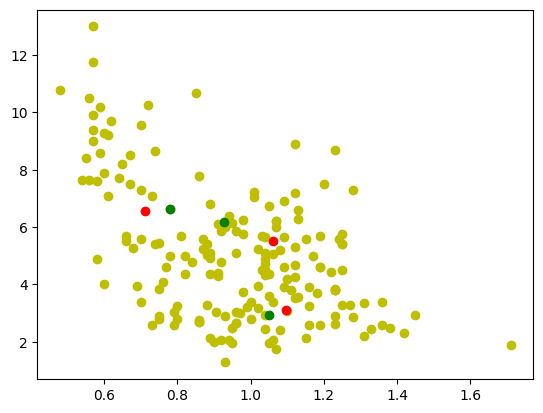

In [48]:
C111 = np.zeros((3, 2))
for i in range(3):
    for k in range(2):
        s1, s2 = 0, 0 
        for j in range(l):
            s1 += (m[i][j]**4) * data[j][k]
            s2 += (m[i][j]**4)
        C111[i][k] = s1/s2
print(C111)


plt.plot(x1, x2, 'yo')
x11 = [C[0][0], C[1][0], C[2][0]]
x22 = [C[0][1], C[1][1], C[2][1]]
plt.plot(x11, x22, 'ro')

x111 = [C111[0][0], C111[1][0], C111[2][0]]
x222 = [C111[0][1], C111[1][1], C111[2][1]]
plt.plot(x111, x222, 'go')
plt.show()



In [49]:
data22 = pd.read_csv("../datasets/wine-clustering.csv")
data22 = data22[[str1, str2]]
data22['claster'] = np.zeros((l, 1))
data22

,Hue,Color_Intensity,claster
0,1.04,5.64,0.0
1,1.05,4.38,0.0
2,1.03,5.68,0.0
3,0.86,7.80,0.0
4,1.04,4.32,0.0
...,...,...,...
173,0.64,7.70,0.0
174,0.70,7.30,0.0
175,0.59,10.20,0.0
176,0.60,9.30,0.0


In [50]:
temp = np.zeros(l)
for i in range(l):
    minimum = 1000000000
    for k in range(3):
        if (minimum>m[k][i]):
              minimum = m[k][i]
    for j in range(3):     
        if (minimum == m[j][i]):
           temp[i] = j
temp

array([1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
       2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])